In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import copy as cp
from math import *
import datetime as dt
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
#
import scipy
import scipy.integrate as integrate
from scipy.optimize import root
from scipy.optimize import least_squares

In [3]:
# write list to binary file
def write2pickle(file, fname):
    # store list in binary file so 'wb' mode
    with open(fname, 'wb') as f:
        pickle.dump(file, f)
        print('Done writing list into a binary file')

# Read list to memory
def read_pickle(fname):
    # for reading also binary mode is important
    with open(fname, 'rb') as f:
        file = pd.read_pickle(f)
        return file

# Chech directories exit. Create if not
def check_dir_exist(path):
    if not os.path.isdir(path):
        os.makedirs(path, exist_ok=True)

In [4]:
# This is to enable inline displays
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# Plot parameters
rcParams['figure.figsize'] = 6,4

# Seaborn settings for notebook
rc = {'lines.linewidth': 1.,
      'axes.titlesize': 14,
      'axes.labelsize': 14,
      'xtick.labelsize': 10,
      'ytick.labelsize': 10,
      'legend.fontsize': 10,
      'savefig.dpi': 300,
      'axes.facecolor': 'white'}
sns.set_context('notebook', rc=rc)
sns.set_style('ticks', rc=rc)

In [5]:
# Set directories
path = "../data/"

# Set colors
colormap = ['magenta',
           'darkcyan',
           'darkseagreen',
           'green',
           'royalblue',
           'orangered',
           'steelblue',
           'peru',
           'skyblue',
           'firebrick',
           'blue',
           'red']

# Set found stationary solutions

## Reference model

In [17]:
# expected observables under normal conditions:
a0,mq0,cq0,q0,mL0,mS0,cL0,O10,bL0,bS0,L0,S0 = np.array([5.32028879e+09, 5.43892043e+06, 2.60750605e+06, 3.20098867e+09,
                                                        5.13241818e+04, 1.21841508e+08, 1.07775213e+05, 2.78154330e+07,
                                                        2.82625278e+03, 5.64255248e+03, 1.06716935e+03, 1.33614820e+04])

# Steady state reference
sty0 = np.array([a0,mq0,cq0,q0,mL0,mS0,cL0,O10,bL0,bS0,L0,S0])

# knock-S
sty1 = np.array([2.29529555e+09, 3.36327244e+06, 1.79282544e+06, 2.20086818e+09,
                 6.99550598e+04, 0, 1.63334967e+05, 1.75569280e+05, 
                 1.75569280e+05, 0, 6.59470834e+04, 0])

# knock-LS
sty2 = np.array([5.96205458e+09,  5.69819032e+06,  2.72706015e+06,  3.34775568e+09,
                 0,0,0,0,
                 0,0,0,0])

# modified: lmd_L/2
sty3 = np.array([3.60500385e+09, 4.52734948e+06, 2.18479470e+06, 2.68205969e+09,
                 2.29815368e+05, 4.55392447e+08, 4.85769072e+05, 1.27407054e+08,
                 4.47819184e+03, 2.58724875e+04, 3.37858095e+03, 6.12055856e+04])

# Variable parameters
lmd_a    = 1.47    # ATP molecules degradation rate constant [1/min]
lmd_L    = 0.37    # LINE-1 deactivation rate constant [1/min]
lmd_S    = 1.18    # SINE deactivation rate constant [1/min]

## Modified model (after demethylation)

In [19]:
# # Calculate a0 from experiments
# print("cell Volume [micro-meters^3] =", 4/3*pi*(22/2)**3)

# N_Av = 6.02214076e23 # число Авогадро

# # Calc.
# atp_dV = 2e-6 # Моль*cell_number (from experiment in 5e5 cells)
# # V = 4/3*pi*(22e-6/2)**3*1e-3 * 5e5
# print(f"a0 = {N_Av*atp_dV/5e5*1e-9:.3f} m.p.c.*10^9")

In [18]:
# # expected observables under normal conditions:
# a0,mq0,cq0,q0,mL0,mS0,cL0,O10,bL0,bS0,L0,S0 = np.array([2.40931696e+12, 1.01120553e+07, 3.86703330e+06, 4.74721425e+09,
#                                                         1.31903161e+05, 2.00641730e+08, 2.20941873e+05, 5.74596157e+07,
#                                                         4.01203844e+03, 1.16324573e+04, 1.05977067e+03, 1.31865310e+04])

# # Steady state reference
# sty0 = np.array([a0,mq0,cq0,q0,mL0,mS0,cL0,O10,bL0,bS0,L0,S0])

# # knock-S
# sty1 = np.array([4.45330083e+09, 5.01078199e+06, 2.42674665e+06, 2.97908462e+09,
#                  1.03404963e+05, 0, 2.19353478e+05, 2.35091844e+05, 
#                  2.35091844e+05, 0, 6.18293081e+04, 0])

# # knock-LS
# sty2 = np.array([5.77673751e+09, 9.84214464e+04, 6.79595113e+06, 8.34274993e+09,
#                  0,0,0,0,
#                  0,0,0,0])

# # modified: lmd_L/2
# sty3 = np.array([1.09450724e+10, 7.49307879e+06, 2.89337860e+06, 3.55193626e+09,
#                  6.75168280e+05, 7.39911436e+08, 1.14193475e+06, 2.99599256e+08,
#                  1.01318289e+04, 6.07154616e+04, 5.34728221e+03, 6.87581407e+04])

# # Variable parameters
# lmd_a    = 2.04e-3 # ATP molecules degradation rate constant [1/min]
# lmd_L    = 0.53    # LINE-1 deactivation rate constant [1/min]
# lmd_S    = 2.47    # SINE deactivation rate constant [1/min]

# Set model

In [20]:
# Wild type values
awt = 5.33e9  # characteristic number of ATP
Lwt = 1064.   # number of LINE-1 in wild type
Swt = 13243.  # number of SINE in wild type

### Constants: ###
Ng       = 3.08e9  # total genome size [bp]
Q        = 3804.   # number of housekeeping genes
nq       = 431.    # median HeLa cell protein length [aa]
nQ       = 1300.   # median HeLa housekeeping gene length [bp]
nL       = 6000.   # LINE-1 length [bp]
nS       = 300.    # SINE length [bp]
Naa      = 5.      # number of ATP molecules for adding a.a. [m.p.c. - mol. per cell]
Nnt      = 15.     # number of ATP molecules for adding nt. [m.p.c.]
tdiv     = 22.*60  # HeLa cell cycle duration, in minutes [min] ( == 1320 min )

### Parameter values: ###
rtot     = 9.5e6   # total number of ribosomes [m.p.c.]
A0       = 1.31e10 # energy supply [m.p.c./min]
Xi_max_L = 840.    # maximal integration elongation rate of one LINE-1 transposon [bp/(m.p.c.*min)]
Xi_max_S = 840.    # maximal integration elongation rate of one SINE transposon [bp/(m.p.c.*min)]
K_Xi_L   = 1.1e7   # integration elongation threshold of LINE-1 transposons [m.p.c.]
K_Xi_S   = 1.1e7   # integration elongation threshold of SINE transposons [m.p.c.]
KL       = 2.24e-3 # association constant of LINE-1 mRNA with ORF1p [1/m.p.c.]
wq       = 4.64    # maximal transcription rate of one gene [m.p.c./min]
wL       = 1.      # maximal transcription rate of one LINE-1 [m.p.c./min]
wS       = 20.     # maximal transcription rate of one SINE [m.p.c./min]
Th_nr_q  = 3.8e9   # transcription threshold of one gene [m.p.c.]
Th_nr_L  = 3.8e9   # transcription threshold of one LINE-1 [m.p.c.]
Th_nr_S  = 3.8e9   # transcription threshold of one SINE [m.p.c.]
gm_max_q = 300.    # maximal translation rate of q-RNA (aa/min) [a.a./(m.p.c.*min)]
gm_max_L = 300.    # maximal translation rate of LINE-1 RNA (aa/min) [a.a./(m.p.c.*min)]
K_gm_q   = 25900.  # translation threshold of one q-RNA [m.p.c.]
K_gm_L   = 25900.  # translation threshold of one LINE-1 RNA [m.p.c.]
k_bq     = 5e-8    # 2.7e-2 # cq complexes binding rate constant (diffusion limit) [1/(m.p.c.*min)]
k_bL     = 5e-8    # 2.7e-2 # cL complexes binding rate constant (diffusion limit) [1/(m.p.c.*min)]
k_uq     = 1e-2    # 1e3 # cq complexes unbinding rate constant
k_uL     = 1e-2    # 1e3 # cL complexes unbinding rate constant
k_subS   = 5e-8    # 6e-8 # bS formation (ORFp2+mS) substitution of mL
k_subL   = 5e-6    # 6e-8 # bL formation (ORFp2+mL) substitution of mS
d_mq     = 1.15e-3 # q-RNAs degradation rate constant [1/min]
d_cq     = 1.55e-3 # cq complexes degradation rate constant [1/min]
d_q      = 5.67e-4 # q proteins degradation rate constant [1/min]
d_mL     = 1.15e-3 # LINE-1 RNAs degradation rate constant [1/min]
d_mS     = 1.15e-3 # ! # SINE RNAs degradation rate constant [1/min]
d_cL     = 1.55e-3 # cL complexes degradation rate constant [1/min]
d_O1     = 5.67e-4 # ORF1p degradation rate constant [1/min]
d_bL     = 5.67e-4 # bL complexes degradation rate constant [1/min]
d_bS     = 5.67e-4 # bS complexes degradation rate constant [1/min]

# Add some
rib = rtot - cq0 - cL0 # number of free ribosomes
vrepl_max = Nnt*(Ng/tdiv)/0.8
k_vrepl = 0.25*a0

# copy parameters (lmd_L)
lmd_L_ref = lmd_L

In [21]:
# translation rates:
def vq(cq_, a_):
    return gm_max_q/nq*cq_*a_/(K_gm_q+a_)

def vL(cL_,a_):
    return gm_max_L/(nL/3)*cL_*a_/(K_gm_L+a_)

# integration rates:
def vintL(bL_,O1_,a_):
    return Xi_max_L/nL * bL_*a_/(K_Xi_L+a_)*KL*O1_/(1+KL*O1_)

def vintS(bS_,a_):
    return Xi_max_S/nS * bS_*a_/(K_Xi_S+a_)

# transcription rates:
def om_q(a_):
    return Q*wq*a_/(Th_nr_q+a_)

def om_L(L_,a_):
    return L_*wL*a_/(Th_nr_L+a_)

def om_S(S_,a_):
    return S_*wS*a_/(Th_nr_S+a_)

# replication:
# def vreplf(a_):
#     return vrepl_max*a_/(a_+k_vrepl)

# replication:
def vreplf(a_,bL_,O1_,bS_):
    return Nnt*(Ng/tdiv + vintL(bL_,O1_,a_)*nL + vintS(bS_,a_)*nS)

# ribosomes:
def ribf(cq_,cL_):
    return rtot-cq_-cL_

In [22]:
# Function for integration
def integr_syst(t, y):
    a_,mq_,cq_,q_,mL_,mS_,cL_,O1_,bL_,bS_,L_,S_ = y
    dydt = np.array([A0 - lmd_a*a_ - vreplf(a_,bL_,O1_,bS_) # energy supply + ATP degradation + replication
                   - Nnt * ( om_q(a_)*(nQ) + om_S(S_,a_)*nS + om_L(L_,a_)*nL ) # transcription
                   - Naa * ( vq(cq_,a_)*nq + vL(cL_,a_)*(nL/3) ) # translation
                   - Nnt * ( vintL(bL_,O1_,a_)*nL + vintS(bS_,a_)*nS ), # integration # da/dt
                    om_q(a_) - k_bq*ribf(cq_,cL_)*mq_ + vq(cq_,a_) + k_uq*cq_  - d_mq*mq_, # dmq/dt
                    k_bq*ribf(cq_,cL_)*mq_  - k_uq*cq_ - vq(cq_,a_) - d_cq*cq_, # dcq/dt
                    vq(cq_,a_) - d_q*q_, # dq/dt
                    om_L(L_,a_) - k_bL*ribf(cq_,cL_)*mL_ + k_uL*cL_ + k_subS*mS_*bL_ - k_subL*mL_*bS_ - d_mL*mL_, # dmL/dt
                    om_S(S_,a_) + k_subL*mL_*bS_ - k_subS*mS_*bL_ - d_mS*mS_, # dmS/dt
                    k_bL*ribf(cq_,cL_)*mL_  - k_uL*cL_ - vL(cL_,a_) - d_cL*cL_, # dcL/dt
                    vL(cL_,a_) - vintL(bL_,O1_,a_) - d_O1*O1_, # dO1/dt
                    vL(cL_,a_) + k_subL*mL_*bS_ - vintL(bL_,O1_,a_) - k_subS*mS_*bL_ - d_bL*bL_, # dbL/dt
                    k_subS*mS_*bL_ - k_subL*mL_*bS_ - vintS(bS_,a_) - d_bS*bS_, # dbS/dt
                    vintL(bL_,O1_,a_) - lmd_L*L_, # dL/dt
                    vintS(bS_,a_) - lmd_S*S_]) # dS/dt
    return dydt

In [23]:
# Function for minimization
def solve_syst(y):
    a_,mq_,cq_,q_,mL_,mS_,cL_,O1_,bL_,bS_,L_,S_ = y
    dydt = np.array([A0 - lmd_a*a_ - vreplf(a_,bL_,O1_,bS_) # energy supply + ATP degradation + replication
                   - Nnt * ( om_q(a_)*(nQ) + om_S(S_,a_)*nS + om_L(L_,a_)*nL ) # transcription
                   - Naa * ( vq(cq_,a_)*nq + vL(cL_,a_)*(nL/3) ) # translation
                   - Nnt * ( vintL(bL_,O1_,a_)*nL + vintS(bS_,a_)*nS ), # integration # da/dt
                    om_q(a_) - k_bq*ribf(cq_,cL_)*mq_ + vq(cq_,a_) + k_uq*cq_  - d_mq*mq_, # dmq/dt
                    k_bq*ribf(cq_,cL_)*mq_  - k_uq*cq_ - vq(cq_,a_) - d_cq*cq_, # dcq/dt
                    vq(cq_,a_) - d_q*q_, # dq/dt
                    om_L(L_,a_) - k_bL*ribf(cq_,cL_)*mL_ + k_uL*cL_ + k_subS*mS_*bL_ - k_subL*mL_*bS_ - d_mL*mL_, # dmL/dt
                    om_S(S_,a_) + k_subL*mL_*bS_ - k_subS*mS_*bL_ - d_mS*mS_, # dmS/dt
                    k_bL*ribf(cq_,cL_)*mL_  - k_uL*cL_ - vL(cL_,a_) - d_cL*cL_, # dcL/dt
                    vL(cL_,a_) - vintL(bL_,O1_,a_) - d_O1*O1_, # dO1/dt
                    vL(cL_,a_) + k_subL*mL_*bS_ - vintL(bL_,O1_,a_) - k_subS*mS_*bL_ - d_bL*bL_, # dbL/dt
                    k_subS*mS_*bL_ - k_subL*mL_*bS_ - vintS(bS_,a_) - d_bS*bS_, # dbS/dt
                    vintL(bL_,O1_,a_) - lmd_L*L_, # dL/dt
                    vintS(bS_,a_) - lmd_S*S_]) # dS/dt
    return dydt

# # Function for root finding
# def solve_syst(y):
#     a_ = a0
#     L_ = L0
#     S_ = S0
#     lmd_a,mq_,cq_,q_,mL_,mS_,cL_,O1_,bL_,bS_,lmd_L, lmd_S = y
#     dydt = np.array([A0 - lmd_a*a_ - vreplf(a_,bL_,O1_,bS_) # energy supply + ATP degradation + replication
#                    - Nnt * ( om_q(a_)*(nQ) + om_S(S_,a_)*nS + om_L(L_,a_)*nL ) # transcription
#                    - Naa * ( vq(cq_,a_)*nq + vL(cL_,a_)*(nL/3) ) # translation
#                    - Nnt * ( vintL(bL_,O1_,a_)*nL + vintS(bS_,a_)*nS ), # integration # da/dt
#                     om_q(a_) - k_bq*ribf(cq_,cL_)*mq_ + vq(cq_,a_) + k_uq*cq_  - d_mq*mq_, # dmq/dt
#                     k_bq*ribf(cq_,cL_)*mq_  - k_uq*cq_ - vq(cq_,a_) - d_cq*cq_, # dcq/dt
#                     vq(cq_,a_) - d_q*q_, # dq/dt
#                     om_L(L_,a_) - k_bL*ribf(cq_,cL_)*mL_ + k_uL*cL_ + k_subS*mS_*bL_ - k_subL*mL_*bS_ - d_mL*mL_, # dmL/dt
#                     om_S(S_,a_) + k_subL*mL_*bS_ - k_subS*mS_*bL_ - d_mS*mS_, # dmS/dt
#                     k_bL*ribf(cq_,cL_)*mL_  - k_uL*cL_ - vL(cL_,a_) - d_cL*cL_, # dcL/dt
#                     vL(cL_,a_) - vintL(bL_,O1_,a_) - d_O1*O1_, # dO1/dt
#                     vL(cL_,a_) + k_subL*mL_*bS_ - vintL(bL_,O1_,a_) - k_subS*mS_*bL_ - d_bL*bL_, # dbL/dt
#                     k_subS*mS_*bL_ - k_subL*mL_*bS_ - vintS(bS_,a_) - d_bS*bS_, # dbS/dt
#                     vintL(bL_,O1_,a_) - lmd_L*L_, # dL/dt
#                     vintS(bS_,a_) - lmd_S*S_]) # dS/dt
#     return dydt

# Calculate

In [24]:
# Find roots numerically
incond = sty0.copy() # reference
# incond = sty1.copy() # knock-S
# incond = sty2.copy() # knock-LS
# incond = sty3.copy() # modified: lmd_L/2

# ### Change lmd_L ###
# lmd_L = lmd_L_ref # reference
# lmd_L = lmd_L_ref/2 # lmd_L/2

root0 = root(solve_syst, incond, method='lm', options={'maxiter':10000})
print("success:", root0.success)
print("niter =", root0.nfev)
print(root0.x)

success: True
niter = 14
[5.32028879e+09 5.43892043e+06 2.60750605e+06 3.20098867e+09
 5.13241818e+04 1.21841508e+08 1.07775213e+05 2.78154330e+07
 2.82625278e+03 5.64255248e+03 1.06716935e+03 1.33614820e+04]


In [25]:
# Check with least_squares
incond = root0.x.copy()
lsq = least_squares(solve_syst, incond, method='dogbox', bounds=(0, np.inf), max_nfev=25)
print("message:", lsq.message)
print("success:", lsq.success)
print("niter =", lsq.nfev)
print("root:\n", lsq.x)
print("O-C:\n", solve_syst(lsq.x))

message: `xtol` termination condition is satisfied.
success: True
niter = 2
root:
 [5.32028879e+09 5.43892043e+06 2.60750605e+06 3.20098867e+09
 5.13241818e+04 1.21841508e+08 1.07775213e+05 2.78154330e+07
 2.82625278e+03 5.64255248e+03 1.06716935e+03 1.33614820e+04]
O-C:
 [-1.34110451e-07  7.36690708e-11 -2.67391442e-10  0.00000000e+00
  1.35713663e-12  0.00000000e+00  8.52651283e-14 -1.81898940e-12
 -3.11972670e-12  1.26698652e-12  0.00000000e+00 -1.81898940e-12]


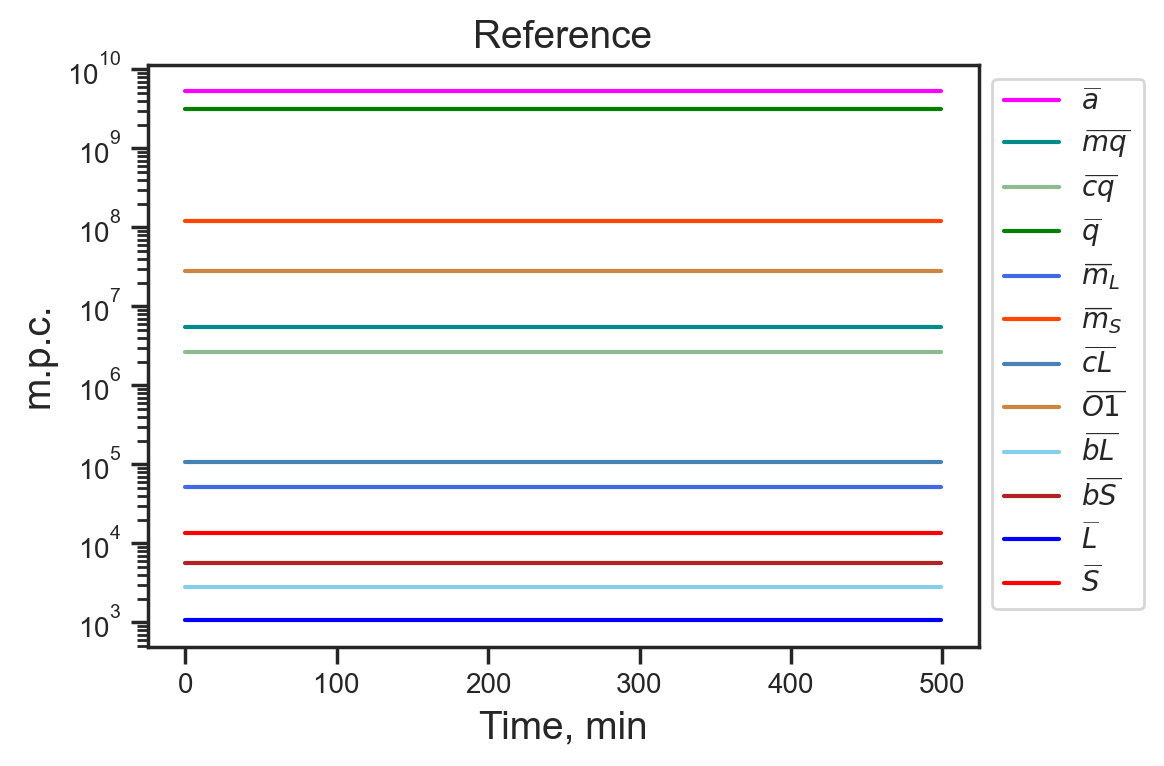

In [26]:
# Reference solution
t_start = 0.
t_finish = 500.
step = 1.
t_span = np.array([t_start, t_finish])
t = np.arange(t_start,t_finish,step)
n0 = 0
n = 500 #int((t_finish-t_start)/step)

# set initial conditions (random)
incond = root0.x.copy()
# seed = 12345
# rng = np.random.default_rng(seed)
# rfloat = rng.random(12)
# incond += incond*(rfloat*2-1)*0.8
# incond[-2] *=1000

# integrate
sol = integrate.solve_ivp(integr_syst, t_span, incond, t_eval=t, dense_output=True, method = 'Radau')

# Plot solution
fig, ax = plt.subplots()

ax.plot(sol.t[n0:n], sol.y[0,n0:n], '-', lw=1.5, color=colormap[0], label=r"$\widebar{a}$")
ax.plot(sol.t[n0:n], sol.y[1,n0:n], '-', lw=1.5, color=colormap[1], label=r"$\widebar{mq}$")
ax.plot(sol.t[n0:n], sol.y[2,n0:n], '-', lw=1.5, color=colormap[2], label=r"$\widebar{cq}$")
ax.plot(sol.t[n0:n], sol.y[3,n0:n], '-', lw=1.5, color=colormap[3], label=r"$\widebar{q}$")
ax.plot(sol.t[n0:n], sol.y[4,n0:n], '-', lw=1.5, color=colormap[4], label=r"$\widebar{m}_L$")
ax.plot(sol.t[n0:n], sol.y[5,n0:n], '-', lw=1.5, color=colormap[5], label=r"$\widebar{m}_S$")
ax.plot(sol.t[n0:n], sol.y[6,n0:n], '-', lw=1.5, color=colormap[6], label=r"$\widebar{cL}$")
ax.plot(sol.t[n0:n], sol.y[7,n0:n], '-', lw=1.5, color=colormap[7], label=r"$\widebar{O1}$")
ax.plot(sol.t[n0:n], sol.y[8,n0:n], '-', lw=1.5, color=colormap[8], label=r"$\widebar{bL}$")
ax.plot(sol.t[n0:n], sol.y[9,n0:n], '-', lw=1.5, color=colormap[9], label=r"$\widebar{bS}$")
ax.plot(sol.t[n0:n], sol.y[10,n0:n],'-', lw=1.5, color=colormap[10], label=r"$\widebar{L}$")
ax.plot(sol.t[n0:n], sol.y[11,n0:n],'-', lw=1.5, color=colormap[11], label=r"$\widebar{S}$")

# Label axes
ax.set_title('Reference')
ax.set_xlabel('Time, min')
ax.set_ylabel('m.p.c.')
ax.set_yscale('log')
ax.axis('auto')
ax.legend(bbox_to_anchor=[1.,1])
plt.tight_layout()
plt.show()

## Check knocked-S model

In [27]:
# Function for minimization
def solve_syst_knock_S(y):
    a_,mq_,cq_,q_,mL_,cL_,O1_,bL_,L_ = y
    dydt = np.array([ A0 - lmd_a*a_ - vreplf(a_,bL_,O1_,0.) # energy supply + ATP degradation + replication
                   - Nnt * ( om_q(a_)*(nQ) + om_L(L_,a_)*nL ) # transcription
                   - Naa * ( vq(cq_,a_)*nq + vL(cL_,a_)*(nL/3) ) # translation
                   - Nnt * ( vintL(bL_,O1_,a_)*nL ), # integration # da/dt
                    om_q(a_) - k_bq*ribf(cq_,cL_)*mq_ + k_uq*cq_ + vq(cq_,a_) - d_mq*mq_, # dmq/dt
                    k_bq*ribf(cq_,cL_)*mq_  - k_uq*cq_ - vq(cq_,a_) - d_cq*cq_, # dcq/dt
                    vq(cq_,a_) - d_q*q_, # dq/dt
                    om_L(L_,a_) - k_bL*ribf(cq_,cL_)*mL_ + k_uL*cL_ - d_mL*mL_, # dmL/dt
                    k_bL*ribf(cq_,cL_)*mL_  - k_uL*cL_ - vL(cL_,a_) - d_cL*cL_, # dcL/dt
                    vL(cL_,a_) - vintL(bL_,O1_,a_) - d_O1*O1_, # dO1/dt
                    vL(cL_,a_) - vintL(bL_,O1_,a_) - d_bL*bL_, # dbL/dt
                    vintL(bL_,O1_,a_) - lmd_L*L_ # dL/dt
           ])
    return dydt

# Function for integration
def integr_syst_knock_S(t, y):
    a_,mq_,cq_,q_,mL_,cL_,O1_,bL_,L_ = y
    dydt = np.array([ A0 - lmd_a*a_ - vreplf(a_,bL_,O1_,0.) # energy supply + ATP degradation + replication
                   - Nnt * ( om_q(a_)*(nQ) + om_L(L_,a_)*nL ) # transcription
                   - Naa * ( vq(cq_,a_)*nq + vL(cL_,a_)*(nL/3) ) # translation
                   - Nnt * ( vintL(bL_,O1_,a_)*nL ), # integration # da/dt
                    om_q(a_) - k_bq*ribf(cq_,cL_)*mq_ + k_uq*cq_ + vq(cq_,a_) - d_mq*mq_, # dmq/dt
                    k_bq*ribf(cq_,cL_)*mq_  - k_uq*cq_ - vq(cq_,a_) - d_cq*cq_, # dcq/dt
                    vq(cq_,a_) - d_q*q_, # dq/dt
                    om_L(L_,a_) - k_bL*ribf(cq_,cL_)*mL_ + k_uL*cL_ - d_mL*mL_, # dmL/dt
                    k_bL*ribf(cq_,cL_)*mL_  - k_uL*cL_ - vL(cL_,a_) - d_cL*cL_, # dcL/dt
                    vL(cL_,a_) - vintL(bL_,O1_,a_) - d_O1*O1_, # dO1/dt
                    vL(cL_,a_) - vintL(bL_,O1_,a_) - d_bL*bL_, # dbL/dt
                    vintL(bL_,O1_,a_) - lmd_L*L_ # dL/dt
           ])
    return dydt

In [31]:
incond = sty1[sty1 != 0].copy() # knock-S

root1 = root(solve_syst_knock_S, incond, method='lm', options={'maxiter':10000})
print("success:", root1.success)
print("niter =", root1.nfev)
print(root1.x)

success: True
niter = 11
[2.29529555e+09 3.36327244e+06 1.79282544e+06 2.20086818e+09
 6.99550598e+04 1.63334967e+05 1.75569280e+05 1.75569280e+05
 6.59470834e+04]


In [32]:
# Check with least_squares
incond = root1.x
lsq = least_squares(solve_syst_knock_S, incond, method='dogbox', bounds=(0, np.inf), max_nfev=25)
print("message:", lsq.message)
print("success:", lsq.success)
print("niter =", lsq.nfev)
print("root:\n", lsq.x)
print("O-C:\n", solve_syst_knock_S(lsq.x))

message: `gtol` termination condition is satisfied.
success: True
niter = 2
root:
 [2.29529555e+09 3.36327244e+06 1.79282544e+06 2.20086818e+09
 6.99550598e+04 1.63334967e+05 1.75569280e+05 1.75569280e+05
 6.59470834e+04]
O-C:
 [ 0.00000000e+00 -2.27373675e-11  2.27373675e-11  0.00000000e+00
 -2.87059265e-12  3.97903932e-12  1.77635684e-12  1.77635684e-12
  0.00000000e+00]


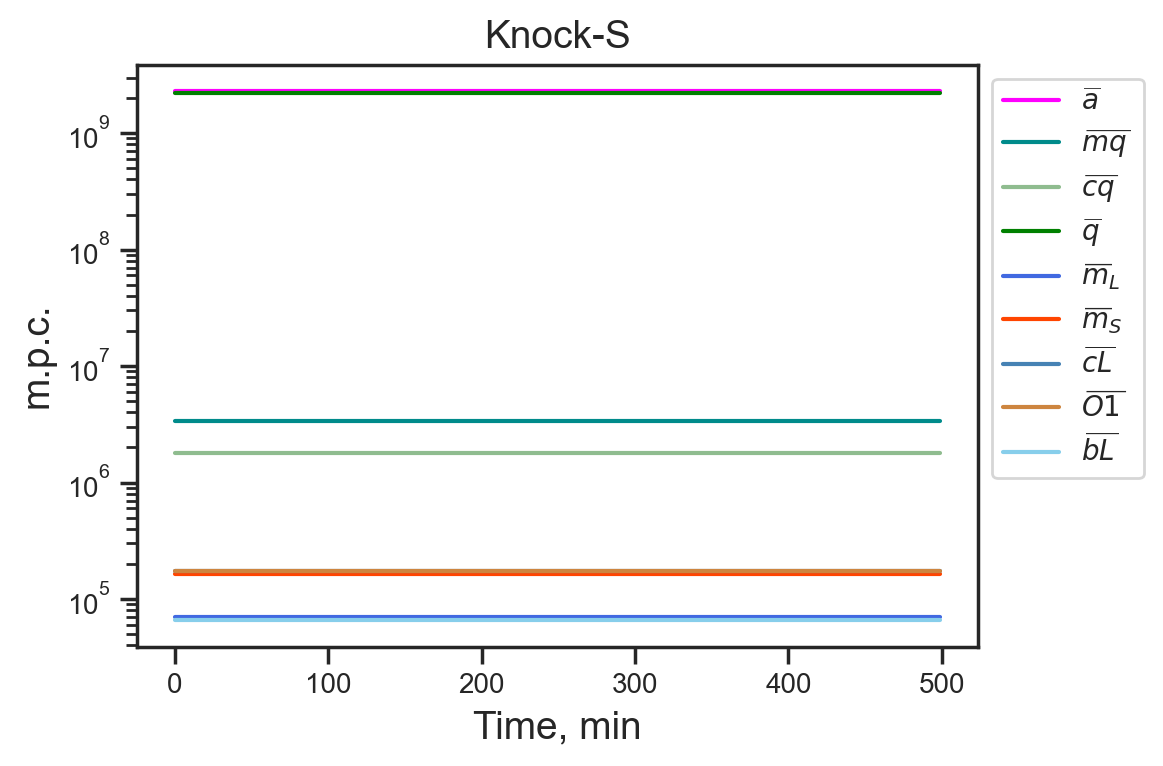

In [33]:
# Reference solution
t_start = 0.
t_finish = 1000.
step = 1.
t_span = np.array([t_start, t_finish])
t = np.arange(t_start,t_finish,step)
n0 = 0
n = 500 #int((t_finish-t_start)/step)

# set initial conditions
incond = root1.x.copy()

# integrate
sol = integrate.solve_ivp(integr_syst_knock_S, t_span, incond, t_eval=t, dense_output=True, method = 'Radau')

# Plot solution
fig, ax = plt.subplots()

ax.plot(sol.t[n0:n], sol.y[0,n0:n], '-', lw=1.5, color=colormap[0], label=r"$\widebar{a}$")
ax.plot(sol.t[n0:n], sol.y[1,n0:n], '-', lw=1.5, color=colormap[1], label=r"$\widebar{mq}$")
ax.plot(sol.t[n0:n], sol.y[2,n0:n], '-', lw=1.5, color=colormap[2], label=r"$\widebar{cq}$")
ax.plot(sol.t[n0:n], sol.y[3,n0:n], '-', lw=1.5, color=colormap[3], label=r"$\widebar{q}$")
ax.plot(sol.t[n0:n], sol.y[4,n0:n], '-', lw=1.5, color=colormap[4], label=r"$\widebar{m}_L$")
ax.plot(sol.t[n0:n], sol.y[5,n0:n], '-', lw=1.5, color=colormap[5], label=r"$\widebar{m}_S$")
ax.plot(sol.t[n0:n], sol.y[6,n0:n], '-', lw=1.5, color=colormap[6], label=r"$\widebar{cL}$")
ax.plot(sol.t[n0:n], sol.y[7,n0:n], '-', lw=1.5, color=colormap[7], label=r"$\widebar{O1}$")
ax.plot(sol.t[n0:n], sol.y[8,n0:n], '-', lw=1.5, color=colormap[8], label=r"$\widebar{bL}$")

# Label axes
ax.set_title('Knock-S')
ax.set_xlabel('Time, min')
ax.set_ylabel('m.p.c.')
ax.set_yscale('log')
ax.axis('auto')
ax.legend(bbox_to_anchor=[1.,1])
plt.tight_layout()
plt.show()